In [1]:
import pandas as pd
import plotly.express as px
mapbox_token="pk.eyJ1IjoiemFjaDE4MTgxOCIsImEiOiJjazhrZjBkZHQwMTdxM2Zwem5obHBneDdtIn0.gG_MrTFb9TiejDTHKAdL2A"
px.set_mapbox_access_token(mapbox_token)

## All fires in California from 8/17/2013 - 10/14/2019

In [2]:
df = pd.read_csv("csv/California_fire_incidents.csv")

In [3]:
# Relevant Columns
df = df[['Name', 'AcresBurned', 'Active', 'Started', 'ArchiveYear', 'Counties', 'CountyIds', 'Fatalities', 'Latitude', 'Longitude', 'StructuresDestroyed', 'StructuresDamaged', ]]

In [4]:
# Bare bones plotting
names_acres_locations = df[['Name','AcresBurned','Latitude','Longitude', 'ArchiveYear']]
names_acres_locations = names_acres_locations.dropna(how='any')

In [5]:
mask = []
for fire in names_acres_locations.iterrows():
    if fire[1][1] <= .01 or fire[1][2] <= .01:
        mask.append(False)
    else:
        mask.append(True)

In [6]:
names_acres_locations = names_acres_locations[mask]

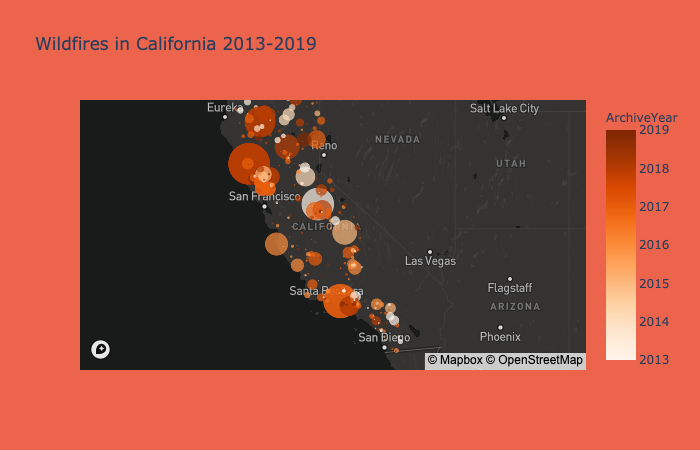

In [8]:
title = 'Wildfires in California 2013-2019'
df = names_acres_locations.sort_values('AcresBurned', ascending=False)[:660]
fig_scat = px.scatter_mapbox(
        df,
        lat="Latitude",
        lon="Longitude",
        size="AcresBurned",
        size_max=30,
        color="ArchiveYear",
        color_continuous_scale="Oranges",
        hover_name="Name",
        hover_data={'AcresBurned':True, 'ArchiveYear':True, 'Latitude':False, 'Longitude':False},
        mapbox_style='dark',
        center={'lat':36.778259, 'lon':-119.417931},
        zoom=4,
        width=450,
        height=500,
        title=title
    )
fig_scat.update_layout(
    paper_bgcolor='rgba(236, 100, 75, 1)'
)
fig_scat.show("png")